In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [39]:
DATA_DIR = os.path.abspath(os.path.join(os.getcwd(), "../", "data"))
NAICS_DATA = os.path.join(DATA_DIR, "processed/coverwallet_preprocessed.parquet")

In [40]:
df = pd.read_parquet(NAICS_DATA)

In [41]:
df.head()

,NAICS,BUSINESS_DESCRIPTION,NAICS_2,PREPROCESSED_DESCRIPTION
0,722511.0,Zenyai Viet Cajun & Pho Restaurant is dedicate...,72,Zenyai Viet Cajun Pho Restaurant dedicate offe...
1,541330.0,"Kilduff Underground Engineering, Inc. (KUE) is...",54,Kilduff Underground Engineering Inc. KUE geote...
2,453998.0,024™ is a premium home fragrance brand that de...,45,024 ™ premium home fragrance brand design elev...
3,561720.0,Our Services include Office Cleaning Carpet cl...,56,service include office cleaning carpet cleanin...
4,621610.0,NYS Licensed Home Health Agency,62,NYS license Home Health Agency


## Descriptions similarity


In [42]:
# calculate tf-idf for each document
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["PREPROCESSED_DESCRIPTION"])

Let's calculate the cosine similarity between the texts in naics 11 and the rest of the descriptions.


In [43]:
X_11 = X[df["NAICS_2"] == 11]

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X_11, X)

In [45]:
cosine_sim.shape

(26, 14175)

In [46]:
def get_similar_docs(df, cosine_sim, doc_id, top_n=10):
    similar_docs = np.argsort(cosine_sim[doc_id])[::-1][1 : top_n + 1]
    return df.iloc[similar_docs]

In [47]:
similar_11 = []
for i in range(len(cosine_sim)):
    similar_11.append(get_similar_docs(df, cosine_sim, i, top_n=10))

df_similar_11 = pd.concat(similar_11)

In [69]:
df_similar_11["NAICS_2"].value_counts()

NAICS_2
56    64
54    54
42    35
23    29
11    13
33     8
31     8
48     7
45     6
72     5
53     5
81     5
61     5
44     3
32     3
49     3
22     2
51     2
62     1
52     1
21     1
Name: count, dtype: int64

In [70]:
similar_docs = np.argsort(cosine_sim[1])[::-1][:11]

df.iloc[similar_docs]

,NAICS,BUSINESS_DESCRIPTION,NAICS_2,PREPROCESSED_DESCRIPTION,DESCRIPTION_LENGTH,PREPROCESSED_DESCRIPTION_LENGTH
611,115310.0,Allison Tree Consulting directs and monitors w...,11,Allison Tree Consulting direct monitor work tr...,42,28
9084,541990.0,Samudaworth provides tree services such as tre...,54,Samudaworth provide tree service tree removal ...,14,11
12886,561730.0,"Tree planting, tree removal, tree support syst...",56,tree planting tree removal tree support system...,16,15
3709,561730.0,"Tree pruning, tree removal, stump grinding and...",56,tree pruning tree removal stump grinding tree ...,9,8
2239,561730.0,Full Service Company specializing in tree serv...,56,Service company specialize tree service landsc...,27,21
7913,561730.0,"Tree removal, tree pruning, stump grinding, pl...",56,tree removal tree pruning stump grinding plant...,17,15
7612,238990.0,NYC Tree Pit Services is a social enterprise d...,23,NYC Tree Pit Services social enterprise dedica...,54,34
6426,115310.0,Certified Arborists (Tree Consultants) on-site...,11,Certified Arborists Tree Consultants site dire...,33,18
13249,561730.0,Parshall Tree Service is a full service tree c...,56,Parshall Tree Service service tree company spe...,20,15
12829,561730.0,We are a full-service professional tree servic...,56,service professional tree service company fami...,18,13


In [73]:
df.iloc[similar_docs]["BUSINESS_DESCRIPTION"].values

array(['Allison Tree Consulting directs and monitors work around trees during heavy construction activity.  The company supervises planting, pruning and mitigation techniques and acts as a liaison to the NYC Parks Department making sure all requirements are met to protect trees and contractors.',
       'Samudaworth provides tree services such as tree removal, tree pruning, tree planting and landscaping.',
       'Tree planting, tree removal, tree support systems, tree pruning, tree preservation, arborist consultations, and landscaping services.',
       'Tree pruning, tree removal, stump grinding and tree planting.',
       'Full Service Company specializing in tree service and landscape services. Our services including tree removal, tree pruning, tree trimming, tree planting, cleaning & grubbing and landscape installations.',
       'Tree removal, tree pruning, stump grinding, planting, decompactions, fertilization,firewood, Tree and shrub planting and all landscape work',
       'NY

Each document has a pair of keywords that are the most important for the description. For example, for the las document in naics 11, the word "tree" appears in all the similar documents.

The problem here is that not all businesses that are similar to each other are classified in the same category. For example, the descriptions in naics 11 (Agriculture, Forestry, Fishing and Hunting) are quite similar in general to the descriptions in naics 56 (Administrative and Support and Waste Management and Remediation Services). This shows that the descriptions in naics 56 are not very specific and can be applied to a wide range of businesses or that these businesses are wrongly classified.


Let's do the same for naics 54.


In [50]:
X_54 = X[df["NAICS_2"] == 54]

In [51]:
cosine_sim_54 = cosine_similarity(X_54, X)

Now we are using top 5 instead of top 10 similar because the naics 54 has much more instances.


In [52]:
similar_54 = []
for i in range(len(cosine_sim_54)):
    similar_54.append(get_similar_docs(df, cosine_sim_54, i, top_n=5))

df_similar_54 = pd.concat(similar_54)

In [53]:
df_similar_54["NAICS_2"].value_counts()

NAICS_2
54    14615
23     1522
56      880
61      790
51      545
81      396
71      384
53      375
62      327
42      238
52      195
33      151
32      124
48      114
45       75
44       68
92       60
72       47
31       42
49       28
55       13
22       12
11        5
21        4
Name: count, dtype: int64

In [54]:
df_similar_54

,NAICS,BUSINESS_DESCRIPTION,NAICS_2,PREPROCESSED_DESCRIPTION
2770,541330.0,Dawn Underground Engineering is an engineering...,54,Dawn Underground Engineering engineering consu...
10636,541330.0,Engineering and Construction,54,engineering construction
12125,237130.0,Powerline construction. Underground and Overhe...,23,powerline construction underground overhead el...
12203,237110.0,David Lawler Construction is a utility constru...,23,David Lawler Construction utility construction...
4931,541330.0,"Infrastructure Engineering, Inc., provides civ...",54,Infrastructure Engineering Inc. provide civil ...
...,...,...,...,...
11813,541611.0,"Develop Leaders, often while coaching, solving...",54,develop leader coach solve problem Continuous ...
5221,541611.0,Change and Transition Management Consulting fo...,54,Change Transition Management Consulting client...
3497,541618.0,We provide IT Staffing and Consulting for busi...,54,provide Staffing Consulting business transform...
5634,541618.0,KBD Strategic Consulting is a research consult...,54,KBD Strategic Consulting research consultancy ...


As a difference from the previous case, the descriptios in naics 54 (Professional, Scientific, and Technical Services) are similar to the descriptions in the same naics in most cases. This shows that the descriptions in naics 54 are more specific and can be applied to a narrower range of businesses.

The next most similar to this naics is naics 23 (Construction).


Now let's try with any naics that was wrongly classified in the baseline model, for example, naics 44.


In [55]:
X_44 = X[df["NAICS_2"] == 44]

In [56]:
cosine_sim_44 = cosine_similarity(X_44, X)

In [57]:
similar_44 = []
for i in range(len(cosine_sim_44)):
    similar_44.append(get_similar_docs(df, cosine_sim_44, i, top_n=10))

df_similar_44 = pd.concat(similar_44)

In [58]:
df_similar_44["NAICS_2"].value_counts()

NAICS_2
23    313
42    305
44    214
54    144
33    103
81     70
72     68
56     46
45     43
31     30
53     28
48     27
51     26
32     20
61     15
49     11
71      6
62      5
52      2
22      2
11      1
92      1
Name: count, dtype: int64

In [59]:
df_similar_44

,NAICS,BUSINESS_DESCRIPTION,NAICS_2,PREPROCESSED_DESCRIPTION
10651,445110.0,"TS QUEENSLAND LLC, is a supermarket located in...",44,TS QUEENSLAND LLC supermarket locate Bronx ope...
4538,424410.0,"Heavenly Exports, LLC supplies adequate food p...",42,Heavenly Exports LLC supply adequate food prod...
1274,424430.0,Distributor of dairy and other food products t...,42,distributor dairy food product bodega restaura...
567,722511.0,Provider of Food and Groceries both over the c...,72,provider food grocery counter online delivery ...
8960,424480.0,"Russo Produce sells produce i.e. fruits, veget...",42,Russo Produce sell produce i.e. fruit vegetabl...
...,...,...,...,...
3615,238330.0,Exceed Flooring supplies and installs commerci...,23,Exceed Flooring supply install commercial floo...
6899,236220.0,My business is a New York City construction bu...,23,business New York City construction business m...
1736,238330.0,BT Flooring Solutions furnishes and installs f...,23,BT Flooring Solutions furnish install flooring...
5549,238330.0,Commercial flooring contractor,23,commercial flooring contractor


In [93]:
df_similar_44["BUSINESS_DESCRIPTION"].values[5]

'Asiri Convenience Store sells groceries, food and other items.'

In this case, the descriptions in naics 44 (Retail Trade) are similar to the descriptions in naics 23 (Manufacturing) and naics 42 (Wholesale Trade). It is strange that the descriptions in naics 44 are not similar to the descriptions in naics 45 (Retail Trade) which is in the same correct classification for this naics.


Finaly, let's see what happens with naics 33


In [60]:
X_33 = X[df["NAICS_2"] == 33]

In [61]:
cosine_sim_33 = cosine_similarity(X_33, X)

In [62]:
similar_33 = []
for i in range(len(cosine_sim_33)):
    similar_33.append(get_similar_docs(df, cosine_sim_33, i, top_n=10))

df_similar_33 = pd.concat(similar_33)

In [63]:
df_similar_33["NAICS_2"].value_counts()

NAICS_2
33    2297
23    1530
54     670
42     660
81     256
56     238
62     193
32     184
44     173
45     106
31      81
53      81
48      72
61      71
51      70
71      36
72      28
22      24
49      21
52      12
92       8
21       5
55       2
11       2
Name: count, dtype: int64

For naics 33 (Manufacturing), the descriptions are similar to the descriptions in naics 23 (Construction) primarily. This shows that the descriptions in naics 33 are not very specific and can be applied to a wide range of businesses or that these businesses are wrongly classified.

In addition, this naics is classified in the same category as naics 31 and naics 32, but the descriptions seem to be not very similar to each other.


## Descriptions length


In order to see if there are problems related to the length of the descriptions, let's calculate the number of words of all descriptions and analyze the distribution of the lengths.


In [64]:
df["DESCRIPTION_LENGTH"] = df["BUSINESS_DESCRIPTION"].apply(lambda x: len(x.split()))

In [65]:
df["PREPROCESSED_DESCRIPTION_LENGTH"] = df["PREPROCESSED_DESCRIPTION"].apply(
    lambda x: len(x.split())
)

In [66]:
df["DESCRIPTION_LENGTH"].describe()

count    14175.000000
mean        42.998942
std         56.405045
min          1.000000
25%         13.000000
50%         26.000000
75%         51.000000
max        812.000000
Name: DESCRIPTION_LENGTH, dtype: float64

A fourth part of the descriptions are shorter than 14 words. This could be a problem because the descriptions are too short to be able to classify them correctly.


A 13 words description looks like this:

Multi-faceted, multi media company, providing a wide array of photography and videography services.


A 26 words description looks like this:

We sell electrical equipment such as conduit, cables, panelboards, EV chargers, wires, conduit fittings, junction boxes,\ntransformers, substation equipment, lighting, etc. to electrical contractors and manufacturers.


A 51 words description looks like this:

Here at 4USIS LLC we provide an elite janitorial experience, including but not limited to construction clean up, commercial business account monthly cleans, event clean ups, bathroom attendants, strip and wax jobs (big and small), window washing, power washing, carpet and upholstery clean and all things in between to satisfy clients.


Even 26 words seem to be too short to be able to classify the description correctly in a naics code, as there are many different businesses that could have a similar description classified in different naics codes.

This quantity represents the 50% of the descriptions, so it is a big problem.


In [67]:
df_short_length = df[df["DESCRIPTION_LENGTH"] < 250]

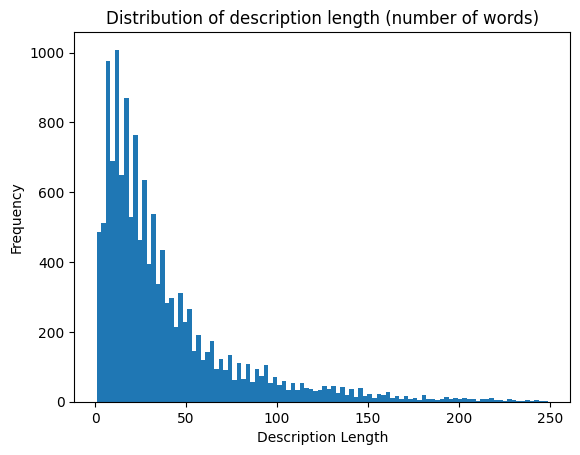

In [68]:
# plot histogram for description length
import matplotlib.pyplot as plt

plt.hist(df_short_length["DESCRIPTION_LENGTH"], bins=100)
plt.title("Distribution of description length (number of words)")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.show()